# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    dfs.append(pd.read_csv(f"./data/csv/{i}_lake_data.csv"))

df = pd.concat(dfs)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,8.4,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [2]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [3]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
1089,2544,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
1090,2522,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
1091,2521,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [4]:
df.dtypes

STN Code                       int64
State Name                    object
Min Temperature              float64
Max Temperature              float64
Min Dissolved Oxygen         float64
Max Dissolved Oxygen         float64
Min pH                       float64
Max pH                       float64
Min Conductivity             float64
Max Conductivity             float64
Min BOD                      float64
Max BOD                      float64
Min Nitrate N + Nitrite N    float64
Max Nitrate N + Nitrite N    float64
Min Fecal Coliform           float64
Max Fecal Coliform           float64
Min Total Coliform           float64
Max Total Coliform           float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum \frac{1}{S_i}} $$ <br />

| Parameter | Standard Value ($S_i$) | Ideal Value ($V_{ideal}$) |
|:-:|:-:| :-: |
| Dissolved Oxygen (mg/L) | 10 | 14.6 |
| pH | 8.5 | 7 |
| Conductivity (µS/cm) | 1000 | 0 |
| Biological Oxygen Demand (mg/L) | 5 | 0 |
| Nitrate (mg/L) | 45 | 0 |
| Fecal Coliform (per 100 mL) | 100 | 0 |
| Total Coliform (per 100 mL) | 1000 | 0 |


In [5]:
stv = np.array([10,8.5,1000,5,45,100,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.22130294 0.2603564  0.00221303 0.44260588 0.04917843 0.02213029
 0.00221303]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2213 |
| pH | 0.2603 |
| Conductivity (µS/cm) |  0.0022 |
| Biological Oxygen Demand (mg/L) | 0.4426 |
| Nitrate (mg/L) | 0.04917 |
| Fecal Coliform (per 100 mL) | 0.02213 |
| Total Coliform (per 100 mL) | 0.00221 |

In [6]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

93.34277805867758

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
Since all unit weights are positive and all standard values are greater than ideal values, we can see that WQI is increasing wrt to each parameter. Thus,
$$ WQI_{\text{min}} = \frac{\sum q_{i,\text{min}} \cdot w_i}{\sum w_i} $$

$$ WQI_{\text{max}} = \frac{\sum q_{i,\text{max}} \cdot w_i}{\sum w_i} $$

Assuming that WQI is normally distributed over all the samples for a given lake, the average value of WQI is roughly the arithmetic mean of max and min values.

$$ WQI_{\text{avg}} = \frac{WQI_{\text{min}} + WQI_{\text{max}}}{2} $$

Since WQI is linearly dependent on all variables, this is equivalent to first taking the averages of all variables and then plugging it into the formula, i.e

$$ WQI_{\text{avg}}  = \frac{\sum \frac{q_{i,\text{min}} + q_{i,\text{max}}}{2} \cdot w_i}{\sum w_i} = \frac{\sum q_{i,\text{avg}} \cdot w_i}{\sum w_i} $$


In [7]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN',
    'Fecal Coliform':'FC',
    'Total Coliform':'TC'
},inplace=True)
df_a

,DO,pH,EC,BOD,NN,FC,TC
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1088,7.45,7.85,539.0,2.95,1.100,560.0,1400.0
1089,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0
1090,7.60,7.25,21.0,1.05,0.300,90.0,160.0
1091,7.70,7.25,28.0,1.40,0.300,95.0,220.0


# Classification of water bodies

In [8]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a

,STN Code,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


# Boxplots

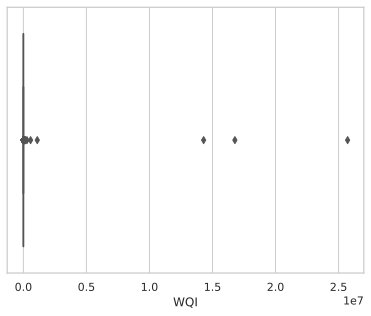

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("WQI")

We can see that there is an extreme right skew to the WQI, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers (roughly 7.5% of the data) in order to improve the generalizability of the model 

In [10]:
df_a = df_a[df_a["WQI"]<2000]
df_a

,STN Code,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


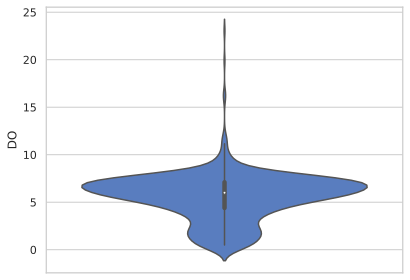

In [11]:
def violinplot(feature):
    sns.violinplot(data=df_a,y=feature,orient='v')
    
violinplot("DO")

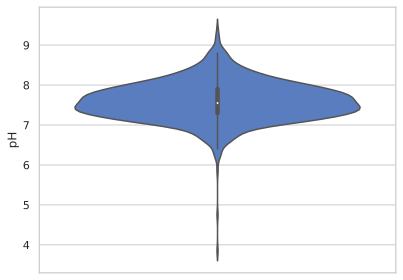

In [12]:
violinplot("pH")

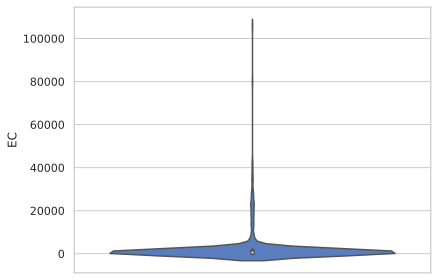

In [13]:
violinplot("EC")

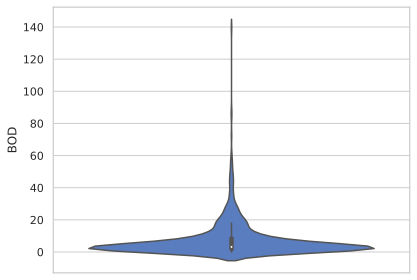

In [14]:
violinplot("BOD")

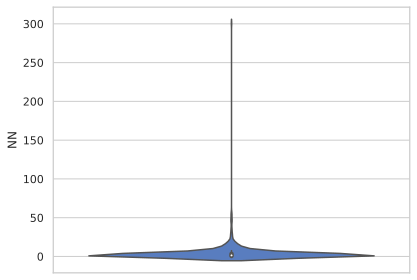

In [15]:
violinplot("NN")

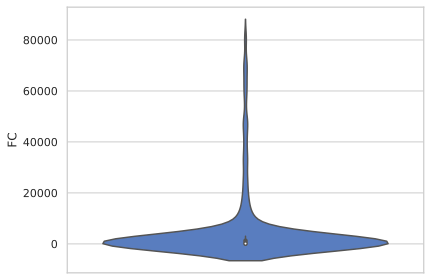

In [16]:
violinplot("FC")

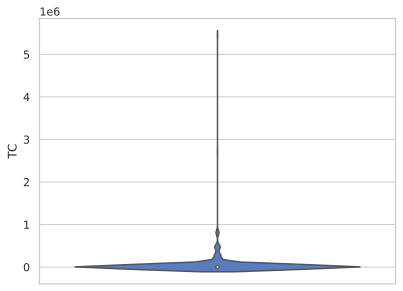

In [17]:
violinplot("TC")

Even after removing extreme values of WQI, we see that most parameters have skewed distributions with outliers. In order to deal with this, we use robust scaling instead of standardizing the data.

In [18]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[31, 461, 248, 102, 165]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 31 |
| 50 - 100 | Good | 461 |
| 100 - 200 | Poor | 248 |
| 200 - 300 | Very Poor | 102 |
| > 300 | Unsuitable for Drinking | 165 |

# Predicting WQI with lesser parameters

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 0
ncols = ["DO","pH","EC","BOD","NN","FC","TC"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,BOD,NN,FC,TC,WQI
0,-0.333333,0.666667,-0.074777,-0.134328,-0.154930,-0.031635,-0.071533,84.180566
1,-0.240741,0.166667,0.839844,0.388060,-0.211268,-0.044371,-0.083796,108.564674
2,-1.722222,-0.333333,1.523438,2.962687,0.933099,-0.062859,-0.046715,275.321207
3,0.648148,-0.666667,-0.459821,-0.111940,-0.369718,7.070666,4.059854,253.145354
4,-0.296296,0.250000,-0.094866,-0.231343,-0.352113,-0.055053,-0.078248,72.905336
...,...,...,...,...,...,...,...,...
800,0.370370,-0.750000,-0.428571,-0.246269,-0.316901,-0.024651,-0.046715,53.733669
801,0.370370,-1.166667,-0.590402,-0.298507,-0.440141,0.608053,0.785255,63.896744
802,0.370370,-0.166667,-0.449777,-0.246269,-0.301056,0.453985,0.394161,73.034428
803,0.592593,1.166667,-0.191406,-0.044776,0.260563,0.423172,0.223358,95.250095


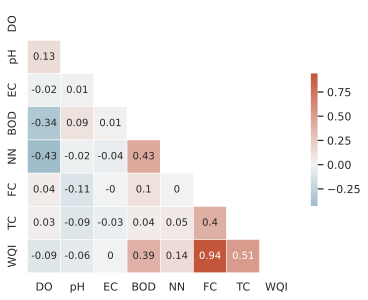

In [20]:
cmatrix = sdf.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(cmatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cmatrix, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},annot=True,annot_kws={"fontsize":10})
plt.show()

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the top 5 highest correlations, we get BOD,Fecal Coliform,Total Coliform,Nitrate and Nitrites and Dissolved Oxygen. We drop Total Coliform and Nitrates since they are intercorrelated with Fecal Coliform and BOD respectively, reducing our feature set to 3.

In [21]:
selected_features = [0,3,5] # BOD,Fecal Coliform,Dissolved Oxygen
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(805, 3)


# Linear Regressors

### OLS

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg = LinearRegression().fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 17.025089641360953
R2 : 0.9970678876169681


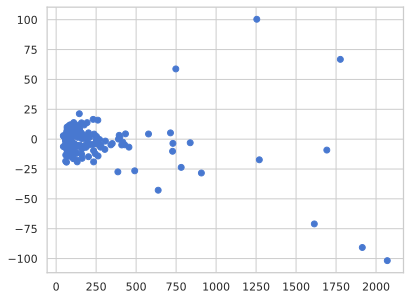

In [23]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [24]:
print(reg.coef_)

[-10.06156163  60.74186323  28.75866396]


Accuracy = 0.9158415841584159


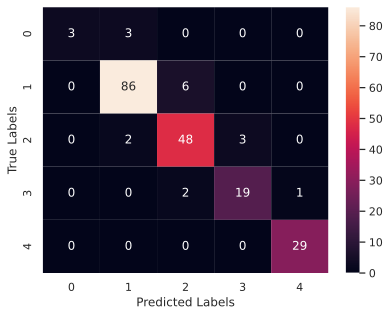

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

#testing classification accuracy
y_c = classify(y_test.to_numpy())
y_c_hat2 = classify(y_hat)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat2)}')
cm = confusion_matrix(y_c,y_c_hat2)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Ridge Regression

Ridge regression imposes an $\ell^{2}$ penalty which also tends to shrink the coefficients towards 0. Main usage in our case would be to treat multicollinearity since the selected features are still moderately correlated to each other.

In [26]:
from sklearn.linear_model import RidgeCV

reg3 = RidgeCV(alphas=[1e-3,5e-3,1e-2,5e-2,0.1,0.5,1,5,10]).fit(X_train_,y_train)
y_hat3 = reg3.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat3,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat3)}")

RMSE: 17.02855988135562
R2 : 0.9970666921847114


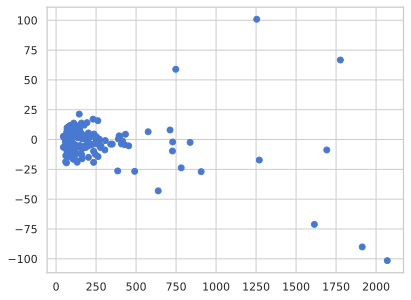

In [27]:
residuals = y_test-y_hat3
plt.scatter(y_hat3,residuals)
plt.show()

Similar to the residual plots of the previous 2 predictors

In [28]:
print(reg3.coef_)
print(reg3.alpha_)

[-10.08321248  60.45922749  28.75984642]
10.0


Accuracy = 0.9108910891089109


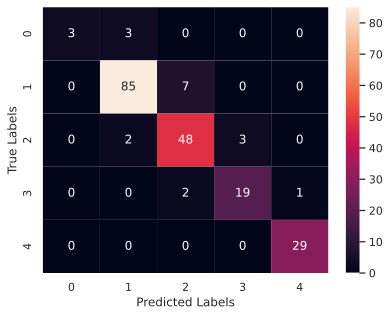

In [29]:
y_c_hat3 = classify(y_hat3)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat3)}')
cm = confusion_matrix(y_c,y_c_hat3)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Non Linear Regressors

### Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(3,25)}
clf = GridSearchCV(DecisionTreeRegressor(random_state=seed),params,n_jobs=5)
clf.fit(X_train_,y_train)
reg4 = clf.best_estimator_
y_hat4 = reg4.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat4,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat4)}")

RMSE: 53.79645962326844
R2 : 0.9707241719006169


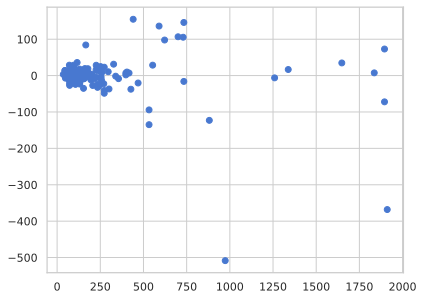

In [31]:
residuals = y_test-y_hat4
plt.scatter(y_hat4,residuals)
plt.show()

Accuracy = 0.9158415841584159


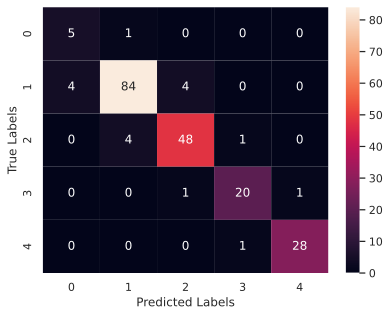

In [32]:
y_c_hat4 = classify(y_hat4)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat4)}')
cm = confusion_matrix(y_c,y_c_hat4)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Support Vector Regression

In [33]:
from sklearn.svm import SVR

params = {'C':range(100,1500,100),'epsilon':np.linspace(0.05,0.25,10)}
clf2 = GridSearchCV(SVR(),params,n_jobs=5)
clf2.fit(X_train_,y_train)
reg5 = clf2.best_estimator_
y_hat5 = reg5.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat5,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat5)}")

RMSE: 15.151356013956029
R2 : 0.9976777722868334


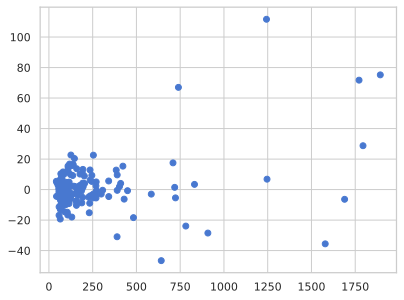

In [34]:
residuals = y_test-y_hat5
plt.scatter(y_hat5,residuals)
plt.show()

Accuracy = 0.9405940594059405


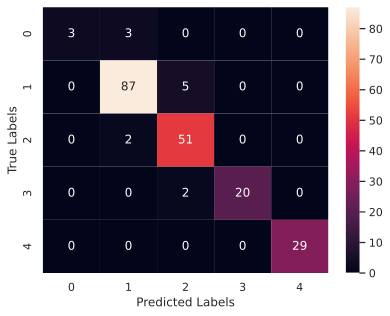

In [35]:
y_c_hat5 = classify(y_hat5)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat5)}')
cm = confusion_matrix(y_c,y_c_hat5)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Models

### Multinomial Logistic Regression

Accuracy = 0.9306930693069307


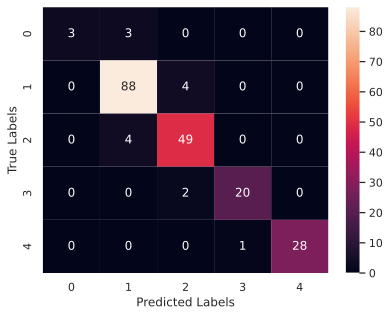

In [36]:
from sklearn.linear_model import LogisticRegression

y_c_train = classify(y_train.to_numpy())
w = {
    0 : 4,
    1 : 1,
    2 : 1,
    3 : 1.2,
    4 : 1
}
clf3 = LogisticRegression(random_state=seed,solver='newton-cg',class_weight=w).fit(X_train_,y_c_train)
y_c_hat6 = clf3.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat6)}')
cm = confusion_matrix(y_c,y_c_hat6)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Feedforward Neural Network

In [37]:
import torch
from torch.utils.data import DataLoader,TensorDataset

def mask(class_arr):
    m = np.zeros((len(class_arr),5),dtype=int)
    for i,v in enumerate(class_arr):
        m[i,v] = 1
    return m

#converting all dataframes to pytorch tensors
X_train_tensor = torch.Tensor(X_train_)
train_target = torch.Tensor(mask(y_c_train))
X_test_tensor = torch.Tensor(X_test_)
test_target = torch.Tensor(mask(y_c))

#grouping training and test data
training_data = TensorDataset(X_train_tensor,train_target)
test_data = TensorDataset(X_test_tensor,test_target)

params = {'batch_size': 16,
          'shuffle': True}
train_loader = DataLoader(training_data,**params)
test_loader = DataLoader(test_data,**params)

print(len(training_data))

805


In [38]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=8, out_features=5, bias=True)
  (5): Softmax(dim=1)
)


In [39]:
dummy_run = torch.rand(10,3)
print(model(dummy_run))

tensor([[0.2875, 0.1902, 0.1663, 0.2277, 0.1284],
        [0.2984, 0.1828, 0.1787, 0.2031, 0.1370],
        [0.2886, 0.1879, 0.1648, 0.2278, 0.1309],
        [0.2939, 0.1846, 0.1736, 0.2127, 0.1352],
        [0.2946, 0.1854, 0.1836, 0.2010, 0.1354],
        [0.2916, 0.1865, 0.1783, 0.2096, 0.1340],
        [0.2951, 0.1831, 0.1819, 0.2021, 0.1377],
        [0.2870, 0.1835, 0.1736, 0.2175, 0.1384],
        [0.2955, 0.1795, 0.1886, 0.1934, 0.1430],
        [0.2866, 0.1849, 0.1704, 0.2219, 0.1362]], grad_fn=<SoftmaxBackward0>)


In [40]:
loss_fn = nn.CrossEntropyLoss(weight = torch.Tensor([10,1.5,1,1.2,1]))
opt = torch.optim.Adam(model.parameters(),lr=1e-3)
epochs = 300

def train_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    avg_loss = 0
    for batch,(x,y_true) in enumerate(dataloader):
        opt.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred,y_true)
        avg_loss += loss.item()
        loss.backward()
        opt.step()
        if (batch+1) % 5 == 0:
            ce_loss = loss.item()
            current = (batch+1)*len(x)
            print(f'loss = {ce_loss}, [{current}/{size}]')
        if batch == n - 1 :
            avg_loss/=n
            return avg_loss
    
def test_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    test_loss,correct = 0,0
    with torch.no_grad():
        for x,y_true in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred,y_true).item()
            correct += (y_pred.argmax(1)==y_true.argmax(1)).type(torch.float).sum().item()
    test_loss /= n
    correct /= size
    print(f'Test Loss = {test_loss} ; Test Accuracy = {correct}')
    return test_loss
            
train_losses = []
test_losses = []
    
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    avg_train_loss = train_loop(train_loader)
    if (epoch+1)%10 == 0:
        test_losses.append(test_loop(test_loader))
        train_losses.append(avg_train_loss)
    print()

Epoch 1
loss = 2.0378310680389404, [80/805]
loss = 1.9498779773712158, [160/805]
loss = 1.8705934286117554, [240/805]
loss = 2.227372646331787, [320/805]
loss = 1.9975169897079468, [400/805]
loss = 2.6982955932617188, [480/805]
loss = 2.7902088165283203, [560/805]
loss = 2.0234761238098145, [640/805]
loss = 2.701712131500244, [720/805]
loss = 3.6588661670684814, [800/805]

Epoch 2
loss = 4.333832740783691, [80/805]
loss = 1.8041502237319946, [160/805]
loss = 1.748776912689209, [240/805]
loss = 1.8958935737609863, [320/805]
loss = 2.739030599594116, [400/805]
loss = 2.0543384552001953, [480/805]
loss = 2.7659032344818115, [560/805]
loss = 1.830235481262207, [640/805]
loss = 1.780004858970642, [720/805]
loss = 3.574702739715576, [800/805]

Epoch 3
loss = 1.7796742916107178, [80/805]
loss = 2.7810046672821045, [160/805]
loss = 1.7877076864242554, [240/805]
loss = 1.6261463165283203, [320/805]
loss = 2.5738770961761475, [400/805]
loss = 4.487308979034424, [480/805]
loss = 1.814632892608642

loss = 2.3381845951080322, [400/805]
loss = 2.3418755531311035, [480/805]
loss = 2.3272805213928223, [560/805]
loss = 1.180519938468933, [640/805]
loss = 1.1114439964294434, [720/805]
loss = 2.3847596645355225, [800/805]

Epoch 24
loss = 2.3785312175750732, [80/805]
loss = 1.2073249816894531, [160/805]
loss = 1.2868621349334717, [240/805]
loss = 1.1970239877700806, [320/805]
loss = 2.344244956970215, [400/805]
loss = 2.40956974029541, [480/805]
loss = 1.2766144275665283, [560/805]
loss = 3.397460699081421, [640/805]
loss = 1.235962986946106, [720/805]
loss = 1.2592954635620117, [800/805]

Epoch 25
loss = 2.3258986473083496, [80/805]
loss = 3.4010491371154785, [160/805]
loss = 2.2903170585632324, [240/805]
loss = 1.3034429550170898, [320/805]
loss = 3.43400502204895, [400/805]
loss = 2.3350794315338135, [480/805]
loss = 1.2537846565246582, [560/805]
loss = 1.1782031059265137, [640/805]
loss = 1.1679706573486328, [720/805]
loss = 2.2222518920898438, [800/805]

Epoch 26
loss = 1.236759066

loss = 1.162331223487854, [400/805]
loss = 2.38887095451355, [480/805]
loss = 1.123071312904358, [560/805]
loss = 2.35899019241333, [640/805]
loss = 2.2256979942321777, [720/805]
loss = 2.2397115230560303, [800/805]

Epoch 47
loss = 1.124024510383606, [80/805]
loss = 1.217362642288208, [160/805]
loss = 1.1112418174743652, [240/805]
loss = 1.1553852558135986, [320/805]
loss = 2.330284833908081, [400/805]
loss = 2.3157243728637695, [480/805]
loss = 1.2086992263793945, [560/805]
loss = 3.45528244972229, [640/805]
loss = 3.4334254264831543, [720/805]
loss = 1.280219554901123, [800/805]

Epoch 48
loss = 2.3106164932250977, [80/805]
loss = 1.1305960416793823, [160/805]
loss = 2.280484914779663, [240/805]
loss = 1.1532572507858276, [320/805]
loss = 3.321577310562134, [400/805]
loss = 1.2143396139144897, [480/805]
loss = 1.097851276397705, [560/805]
loss = 1.3585702180862427, [640/805]
loss = 1.114363670349121, [720/805]
loss = 1.2593698501586914, [800/805]

Epoch 49
loss = 1.2760967016220093,

loss = 1.152788519859314, [240/805]
loss = 1.239098072052002, [320/805]
loss = 1.2214100360870361, [400/805]
loss = 1.136971354484558, [480/805]
loss = 2.338583469390869, [560/805]
loss = 1.0982826948165894, [640/805]
loss = 3.429521322250366, [720/805]
loss = 1.1164867877960205, [800/805]

Epoch 70
loss = 2.3673715591430664, [80/805]
loss = 2.342939615249634, [160/805]
loss = 1.1427001953125, [240/805]
loss = 2.344956398010254, [320/805]
loss = 1.2455207109451294, [400/805]
loss = 1.1892257928848267, [480/805]
loss = 1.2673715353012085, [560/805]
loss = 1.1669460535049438, [640/805]
loss = 2.3289594650268555, [720/805]
loss = 2.4238388538360596, [800/805]
Test Loss = 1.724268418091994 ; Test Accuracy = 0.9306930693069307

Epoch 71
loss = 2.3647658824920654, [80/805]
loss = 1.1783077716827393, [160/805]
loss = 2.2732908725738525, [240/805]
loss = 3.4379734992980957, [320/805]
loss = 1.2182254791259766, [400/805]
loss = 2.2416582107543945, [480/805]
loss = 2.2680697441101074, [560/805]


loss = 3.441524028778076, [160/805]
loss = 3.503896474838257, [240/805]
loss = 2.3542957305908203, [320/805]
loss = 1.1920877695083618, [400/805]
loss = 1.1509913206100464, [480/805]
loss = 1.2084391117095947, [560/805]
loss = 2.5031189918518066, [640/805]
loss = 1.3015499114990234, [720/805]
loss = 1.0798509120941162, [800/805]

Epoch 92
loss = 1.1439085006713867, [80/805]
loss = 1.2734670639038086, [160/805]
loss = 1.1260395050048828, [240/805]
loss = 1.2338659763336182, [320/805]
loss = 1.18812894821167, [400/805]
loss = 2.244382381439209, [480/805]
loss = 1.0891081094741821, [560/805]
loss = 2.153567314147949, [640/805]
loss = 1.177025318145752, [720/805]
loss = 1.147360920906067, [800/805]

Epoch 93
loss = 1.1034584045410156, [80/805]
loss = 2.301051139831543, [160/805]
loss = 1.1125781536102295, [240/805]
loss = 1.1457890272140503, [320/805]
loss = 2.366037130355835, [400/805]
loss = 1.1743075847625732, [480/805]
loss = 1.2762973308563232, [560/805]
loss = 2.309154987335205, [640

loss = 2.2849318981170654, [240/805]
loss = 1.1425081491470337, [320/805]
loss = 1.4035587310791016, [400/805]
loss = 1.232324481010437, [480/805]
loss = 1.1227840185165405, [560/805]
loss = 2.2896666526794434, [640/805]
loss = 2.293794631958008, [720/805]
loss = 2.18965220451355, [800/805]

Epoch 114
loss = 1.1699705123901367, [80/805]
loss = 1.2380540370941162, [160/805]
loss = 1.193886160850525, [240/805]
loss = 1.2182806730270386, [320/805]
loss = 3.368187189102173, [400/805]
loss = 1.2241076231002808, [480/805]
loss = 2.251002788543701, [560/805]
loss = 1.1855677366256714, [640/805]
loss = 2.362739324569702, [720/805]
loss = 2.358138084411621, [800/805]

Epoch 115
loss = 1.0430612564086914, [80/805]
loss = 2.24283766746521, [160/805]
loss = 2.2777390480041504, [240/805]
loss = 1.1137021780014038, [320/805]
loss = 1.1585532426834106, [400/805]
loss = 1.0818395614624023, [480/805]
loss = 1.1837563514709473, [560/805]
loss = 2.2773380279541016, [640/805]
loss = 1.2300373315811157, [7

loss = 1.1373776197433472, [640/805]
loss = 2.4371838569641113, [720/805]
loss = 1.086533784866333, [800/805]

Epoch 135
loss = 1.0873048305511475, [80/805]
loss = 1.1168098449707031, [160/805]
loss = 1.307652473449707, [240/805]
loss = 1.1281461715698242, [320/805]
loss = 2.3233895301818848, [400/805]
loss = 1.2309736013412476, [480/805]
loss = 3.4349148273468018, [560/805]
loss = 1.0815372467041016, [640/805]
loss = 1.188459038734436, [720/805]
loss = 1.3086813688278198, [800/805]

Epoch 136
loss = 1.2412409782409668, [80/805]
loss = 2.260075092315674, [160/805]
loss = 1.3379014730453491, [240/805]
loss = 2.320199966430664, [320/805]
loss = 2.2766833305358887, [400/805]
loss = 1.1381245851516724, [480/805]
loss = 1.1307438611984253, [560/805]
loss = 1.246658444404602, [640/805]
loss = 2.344459056854248, [720/805]
loss = 1.2472630739212036, [800/805]

Epoch 137
loss = 2.2648234367370605, [80/805]
loss = 2.249537229537964, [160/805]
loss = 1.1900101900100708, [240/805]
loss = 2.4072666

loss = 2.177379846572876, [400/805]
loss = 1.093636393547058, [480/805]
loss = 1.1155164241790771, [560/805]
loss = 1.1430702209472656, [640/805]
loss = 1.1877535581588745, [720/805]
loss = 1.1866393089294434, [800/805]

Epoch 160
loss = 1.203749656677246, [80/805]
loss = 1.0758376121520996, [160/805]
loss = 1.2561126947402954, [240/805]
loss = 1.1597334146499634, [320/805]
loss = 1.1931343078613281, [400/805]
loss = 1.2216695547103882, [480/805]
loss = 1.158854365348816, [560/805]
loss = 3.3815670013427734, [640/805]
loss = 1.135564923286438, [720/805]
loss = 2.321735143661499, [800/805]
Test Loss = 1.71655941926516 ; Test Accuracy = 0.9257425742574258

Epoch 161
loss = 4.477297306060791, [80/805]
loss = 1.142104148864746, [160/805]
loss = 3.342420816421509, [240/805]
loss = 1.0778815746307373, [320/805]
loss = 2.192997694015503, [400/805]
loss = 2.1584298610687256, [480/805]
loss = 2.3266000747680664, [560/805]
loss = 1.2210462093353271, [640/805]
loss = 1.2264324426651, [720/805]
lo

loss = 2.163616180419922, [320/805]
loss = 3.4397847652435303, [400/805]
loss = 1.1817160844802856, [480/805]
loss = 2.254000663757324, [560/805]
loss = 1.1023575067520142, [640/805]
loss = 1.190577507019043, [720/805]
loss = 2.356311798095703, [800/805]

Epoch 185
loss = 1.3014805316925049, [80/805]
loss = 1.1894418001174927, [160/805]
loss = 1.144619345664978, [240/805]
loss = 1.2554652690887451, [320/805]
loss = 2.23156476020813, [400/805]
loss = 1.0527745485305786, [480/805]
loss = 1.1276320219039917, [560/805]
loss = 1.2569078207015991, [640/805]
loss = 1.1498452425003052, [720/805]
loss = 1.2564672231674194, [800/805]

Epoch 186
loss = 1.1474425792694092, [80/805]
loss = 2.221329689025879, [160/805]
loss = 2.2372615337371826, [240/805]
loss = 2.3419721126556396, [320/805]
loss = 1.131106972694397, [400/805]
loss = 2.2932941913604736, [480/805]
loss = 3.4865963459014893, [560/805]
loss = 1.2371858358383179, [640/805]
loss = 1.2914644479751587, [720/805]
loss = 1.1460587978363037, 

loss = 1.1436368227005005, [320/805]
loss = 1.2495713233947754, [400/805]
loss = 1.2967947721481323, [480/805]
loss = 3.3976850509643555, [560/805]
loss = 2.391472339630127, [640/805]
loss = 1.1241909265518188, [720/805]
loss = 1.1508947610855103, [800/805]

Epoch 207
loss = 2.4188175201416016, [80/805]
loss = 1.2105940580368042, [160/805]
loss = 2.2442026138305664, [240/805]
loss = 3.3576788902282715, [320/805]
loss = 1.1831547021865845, [400/805]
loss = 1.204694390296936, [480/805]
loss = 2.251025438308716, [560/805]
loss = 1.318002700805664, [640/805]
loss = 1.1650265455245972, [720/805]
loss = 2.1808178424835205, [800/805]

Epoch 208
loss = 2.2261970043182373, [80/805]
loss = 2.34311842918396, [160/805]
loss = 1.2897589206695557, [240/805]
loss = 1.1225112676620483, [320/805]
loss = 1.1143862009048462, [400/805]
loss = 1.3423573970794678, [480/805]
loss = 2.3436055183410645, [560/805]
loss = 2.1893255710601807, [640/805]
loss = 2.3488571643829346, [720/805]
loss = 1.225140571594238

loss = 3.5217368602752686, [800/805]
Test Loss = 1.7221207527013926 ; Test Accuracy = 0.9207920792079208

Epoch 231
loss = 2.2916738986968994, [80/805]
loss = 1.164973497390747, [160/805]
loss = 2.30466890335083, [240/805]
loss = 1.41901695728302, [320/805]
loss = 2.370067834854126, [400/805]
loss = 1.263538122177124, [480/805]
loss = 1.1545835733413696, [560/805]
loss = 1.17646324634552, [640/805]
loss = 1.2335960865020752, [720/805]
loss = 1.1907730102539062, [800/805]

Epoch 232
loss = 1.2265344858169556, [80/805]
loss = 3.3996169567108154, [160/805]
loss = 2.167713165283203, [240/805]
loss = 1.153010368347168, [320/805]
loss = 1.1600466966629028, [400/805]
loss = 3.3820364475250244, [480/805]
loss = 2.3065779209136963, [560/805]
loss = 2.216144561767578, [640/805]
loss = 1.2239435911178589, [720/805]
loss = 1.23190176486969, [800/805]

Epoch 233
loss = 1.1440272331237793, [80/805]
loss = 1.202015995979309, [160/805]
loss = 2.2532799243927, [240/805]
loss = 1.2478128671646118, [320/

loss = 1.254990577697754, [240/805]
loss = 1.166318655014038, [320/805]
loss = 2.1892757415771484, [400/805]
loss = 1.2212146520614624, [480/805]
loss = 1.106431245803833, [560/805]
loss = 1.1876099109649658, [640/805]
loss = 1.1901683807373047, [720/805]
loss = 2.415540933609009, [800/805]

Epoch 255
loss = 3.3668935298919678, [80/805]
loss = 1.2267160415649414, [160/805]
loss = 1.2066493034362793, [240/805]
loss = 2.277318239212036, [320/805]
loss = 1.257089614868164, [400/805]
loss = 1.1275771856307983, [480/805]
loss = 1.1248306035995483, [560/805]
loss = 1.0886707305908203, [640/805]
loss = 2.2709455490112305, [720/805]
loss = 1.170859694480896, [800/805]

Epoch 256
loss = 2.3140389919281006, [80/805]
loss = 1.2380379438400269, [160/805]
loss = 1.1368608474731445, [240/805]
loss = 2.1936545372009277, [320/805]
loss = 1.1827385425567627, [400/805]
loss = 2.1963632106781006, [480/805]
loss = 3.3426334857940674, [560/805]
loss = 2.3515748977661133, [640/805]
loss = 1.3209567070007324

loss = 2.3251447677612305, [400/805]
loss = 2.2967638969421387, [480/805]
loss = 1.1310843229293823, [560/805]
loss = 1.0995904207229614, [640/805]
loss = 1.2216904163360596, [720/805]
loss = 1.1894667148590088, [800/805]

Epoch 279
loss = 1.1205452680587769, [80/805]
loss = 2.397592306137085, [160/805]
loss = 1.1305474042892456, [240/805]
loss = 1.1706424951553345, [320/805]
loss = 1.2995845079421997, [400/805]
loss = 1.187630534172058, [480/805]
loss = 1.2260867357254028, [560/805]
loss = 2.353370428085327, [640/805]
loss = 1.1026859283447266, [720/805]
loss = 1.253254771232605, [800/805]

Epoch 280
loss = 1.1204357147216797, [80/805]
loss = 2.3163845539093018, [160/805]
loss = 1.1652015447616577, [240/805]
loss = 1.255460500717163, [320/805]
loss = 1.1597588062286377, [400/805]
loss = 2.1578731536865234, [480/805]
loss = 3.4847161769866943, [560/805]
loss = 1.1593174934387207, [640/805]
loss = 2.248322010040283, [720/805]
loss = 1.3318507671356201, [800/805]
Test Loss = 1.7149485074

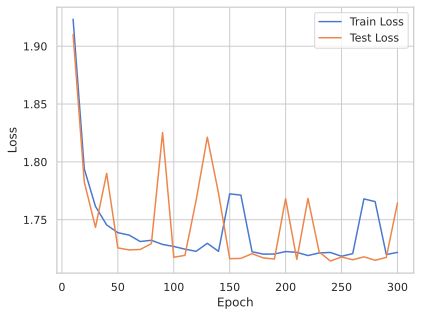

In [41]:
epoch_count = list(range(10,epochs+1,10))
plt.plot(epoch_count,train_losses,label='Train Loss')
plt.plot(epoch_count,test_losses,'-',label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Accuracy = 0.9257425742574258


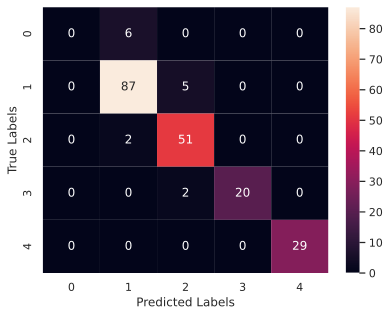

In [42]:
y_c_hat7 = model(X_test_tensor).argmax(1).detach().cpu().numpy()
print(f'Accuracy = {accuracy_score(y_c,y_c_hat7)}')
cm = confusion_matrix(y_c,y_c_hat7)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Comparison of Models

In [43]:
from sklearn.metrics import f1_score,cohen_kappa_score

preds = [y_c_hat2,y_c_hat3,y_c_hat4,y_c_hat5,y_c_hat6,y_c_hat7]
labels = ['OLS','Ridge','DT','SVR','MLR','ANN']
metrics = ['F1 Score','Kappa','Accuracy']
f1_scores = []
kappas = []
accuracies = []

for pred in preds:
    f1_scores.append(f1_score(y_c,pred,average='macro'))
    kappas.append(cohen_kappa_score(y_c,pred))
    accuracies.append(accuracy_score(y_c,pred))

d = {
    'F1 Score' : f1_scores,
    'Kappa' : kappas,
    'Accuracy' : accuracies
}
score_df = pd.DataFrame(data=d,index=labels)

score_df

,F1 Score,Kappa,Accuracy
OLS,0.866796,0.877759,0.915842
Ridge,0.864029,0.870748,0.910891
DT,0.875022,0.879204,0.915842
SVR,0.896724,0.913326,0.940594
MLR,0.885588,0.898482,0.930693
ANN,0.760356,0.890649,0.925743


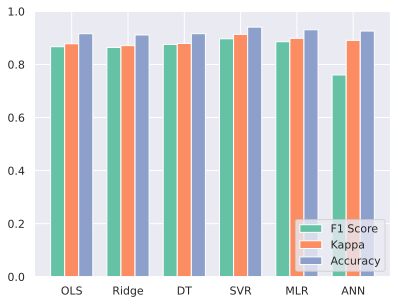

In [44]:
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

x = np.arange(len(labels))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots()
for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=attr)
    multiplier += 1

ax.set_xticks(x + width, labels)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.show()

In [45]:
import time

def atomic_benchmark(estimator, X_test):
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=float)
    for i in range(n_instances):
        instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    return runtimes

def bulk_benchmark(estimator, X_test, n_bulk_repeats):
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_bulk_repeats, dtype=float)
    for i in range(n_bulk_repeats):
        start = time.time()
        estimator.predict(X_test)
        runtimes[i] = time.time() - start
    return runtimes

random_data = np.concatenate([X_train_,X_test_],axis=0)
np.random.shuffle(random_data)

mlr_atomic = atomic_benchmark(clf,random_data)
svr_atomic = atomic_benchmark(clf2,random_data)
mlr_bulk = bulk_benchmark(clf,random_data,100)
svr_bulk = bulk_benchmark(clf2,random_data,100)

print(f"MLR:\natomic: {np.mean(mlr_atomic)*1000:.2f} ms +- {np.std(mlr_atomic)*1000:.2f} ms \nbulk: {np.mean(mlr_bulk)*1000:.2f} ms +- {np.std(mlr_bulk)*1000:.2f} ms")
print(f"SVR:\natomic: {np.mean(svr_atomic)*1000:.2f} ms +- {np.std(svr_atomic)*1000:.2f} ms \nbulk: {np.mean(svr_bulk)*1000:.2f} ms +- {np.std(svr_bulk)*1000:.2f} ms")


MLR:
atomic: 0.08 ms +- 0.02 ms 
bulk: 0.18 ms +- 0.01 ms
SVR:
atomic: 0.12 ms +- 0.01 ms 
bulk: 31.75 ms +- 0.13 ms
